# Computational Lab 1: Looking Closer at Uncertainty

Today you'll be going through making some of the same plots I showed in Monday's class when examining the data you took in lab. You'll explore working with datasets and calculating statistical parameters from them. You'll also explore how to compare measurements and evaluate statistical compatibility. 

Unlike our experimental labs, the computational labs will be done by each of you individually. You're always welcome to look back at the example Jupyter notebook I showed in class if you're looking for examples of syntax, or to google what you're looking for. If you get stuck, don't hesitate to reach out to other classmates or to your TAs. 

Let's start by opening up the data from our lab. 

First you need to get the data. You should:
* Open up the spreadsheet that you entered data in for last week's lab
* Navigate to the second tab, called "Cleaned Sheet" (In order to save you some pain in your data analysis, I got rid of any entries without uncertainties, and ones with text in the uncertainty box.)
* Download this sheet as a .csv file
* Upload the sheet into your home directory on ISAAC (you do this with the "Upload" button on the Jupyter main page)

Now that you've put it in your home directory on ISAAC, we can open it up here.

Throughout this computational lab, you'll see portions that I've done for you, and portions I've left up to you. All the parts you should do will be marked with a `TODO` comment. You'll also see questions for you to answer in text boxes. 

In [20]:
# To read in our spreadsheet, we'll use Pandas -- it has the simplest interface to read in a CSV file
# This line imports the whole pandas module, and assigns it the name "pd". Whenever you want to use any of
# its functions, you just type pd.[whatever the function is called].
import pandas as pd

#TODO: Create a variable named filename and store the name of your csv file in it
filename = "PHYS 251 Lab 1 Uncertainty2.0 - Cleaned Sheet.csv" 

# Now we can use pandas to open our file. The syntax to open a csv file with pandas is below.
# If you've defined your filename variable correctly, you shouldn't have to do anything else here. 
with open(filename) as f:
    data = pd.read_csv(f)
    
# To check that everything loaded correctly, we can look at what you stored in the data variable
# You should see something that looks a lot like the spreadsheet you downloaded
print(data)

#TODO: Try printing the type of the data variable you created. This is a new data type for us, created by
# the pandas module.
print(type(data))


            Who measured?                                            Method?  \
0           Aiden and Sam                      Flights of stairs measurement   
1           Erik and Zach                      Measuring height of each step   
2           Erik and Zach                       Floor to Ceiling Measurement   
3       Shane, Ian, Jared                       Floor to Ceiling Measurement   
4       Shane, Ian, Jared                                  Floor 3 - Floor 2   
5   Chapin, Daniel, Aiden                           Dropping ball out window   
6   Chapin, Daniel, Aiden                         Angle of string out window   
7          Kevin and Jake                          Dropping Ball down stairs   
8          Kevin and Jake                          Ground floor to top floor   
9           Aiden and Sam                                Height of each step   
10          Erik and Evan        Dropping ball out window (5th to 4th floor)   
11          Erik and Evan               

In [21]:
# In this lab, all we're really going to need is the height and uncertainty columns
# Because our data is stored in a pandas dataframe, grabbing the column we want is pretty easy.
# Pandas automatically reads in the headers of the columns, and lets us access the data using them.

# This is the syntax for getting the data in one column based on its header name from a pandas dataframe
heights = data["Height [m]"]

# TODO: Get the data from the uncertainty column, and store it in a variable called "uncertainties"
uncertainties = data["Uncertainty [m]"]

# TODO: Print out both of your new columns of data to check that they look as you expect
print(heights)
print(uncertainties)


0     22.300
1     26.390
2     25.490
3     25.360
4     25.150
5     21.300
6     18.260
7     24.560
8     20.380
9     23.350
10    21.960
11    25.560
12    19.260
13    22.680
14    20.110
15    23.500
16    23.170
17    22.690
18    22.890
19    14.140
20    22.160
21    23.760
22    26.180
23    33.498
24    25.300
25    25.400
26    22.450
27    22.030
28    28.800
29    24.170
30    26.700
Name: Height [m], dtype: float64
0      0.100
1      0.290
2      0.160
3      0.030
4      0.010
5     10.300
6      3.150
7      0.320
8      0.670
9      1.270
10     1.360
11     0.140
12     0.020
13     0.050
14     0.020
15     0.120
16     0.210
17     0.590
18     0.210
19     0.270
20     0.520
21     0.200
22     0.010
23     4.400
24     0.480
25     0.001
26     0.010
27     0.080
28     0.010
29     0.070
30     1.100
Name: Uncertainty [m], dtype: float64


**Question: What datatype are these new variables?**

The new variables are floats. 

[22.3, 26.39, 25.49, 25.36, 25.15, 21.3, 18.26, 24.56, 20.38, 23.35, 21.96, 25.56, 19.26, 22.68, 20.11, 23.5, 23.17, 22.69, 22.89, 14.14, 22.16, 23.76, 26.18, 33.498, 25.3, 25.4, 22.45, 22.03, 28.8, 24.17, 26.7]
range(0, 31)
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


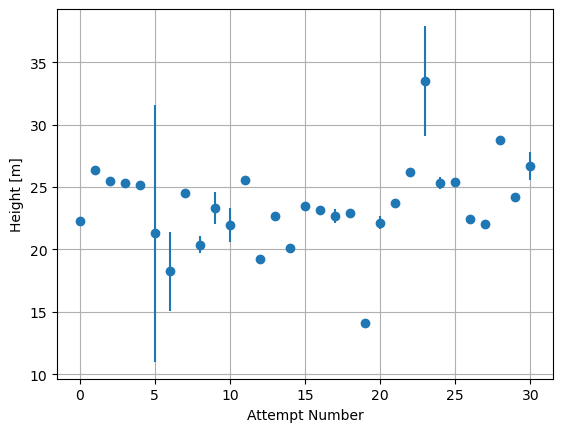

In [22]:
# You now have variables that contain all of the central values measured for the height, and all 
# of the uncertainties measured for the height, in the same order. 
# They're not stored in simple python lists, but they're in a datatype that can easily be converted
# into a python list. You could even cast them to a list if you wanted to:
heights_list = list(heights)
print(heights_list)

# We don't need to do this though; instead we can just hand them to functions that expect lists
# and the functions can do the conversion for us.

# In particular, we can plot them using matplotlib. First we need to import matplotlib's plotting module.
# Just as we did with pandas, we'll give it a short name (plt) so we don't have to type so much.
from matplotlib import pyplot as plt

# To make a plot, we need a list of x values, a list of y values, and if we want uncertainties, a list
# of uncertainties on the y values, all in the same order. 
# If we want to just plot all of the measurements made by the class next to one another, the x axis has
# to be something like the attempt number -- so we need to make a list that just counts the measurements.
# We can do that with this line. It gets the length of our heights dataset, then uses python's range 
# function to make a list of integers that go from 0 to that length - 1. Like our pandas series, this 
# creates an object that isn't a list exactly, but can easily be converted to one and an be treated like one.
indices = range(len(heights))
print(indices)
print(list(indices))

# Finally, now that we have the three lists of values we need, we can use matplotlib to plot them
# We'll use the function errorbar, which allows us to add errorbars to the plot. If you google 
# "matplotlib errorbar" you'll find the function definition, and you can see all the options we can pass it. 
# Anything with an = sign next to it is not required -- it has a default value. Anything with a * in the name
# is also optional. Anything else has to have a value set when calling the function in order for it to work. 
# We call each piece of information we pass to a function an "argument".
plt.errorbar(indices, heights, uncertainties, marker="o", linestyle="none")

# We always want to label our axes!! (And I like the gridlines.)
plt.xlabel("Attempt Number")
plt.ylabel("Height [m]")
plt.grid()

**Question: If I made a list using the function** `range(10)`**, what values would be stored in that list? (Feel free to test it out!)**

Values 0 through 9 are stored within the "range(10)" list. 

**Question: How many required arguments does the errorbar function have? How many optional arguments does it have?**

The error bar function has five arguments, and two of those arguments are optional. 

**Question: Try turning off the** `linestyle="none"` **option by deleting that argument. What happens?**

The data points do not move, however, there is now a line connected each data point in chronological order, just like connect the dots. 

In [23]:
# Let's finally look at some statistics, starting by just looking at the central values you measured.
# We can use built-in functions from Pandas to get these very easily
height_mean = heights.mean()
height_var = heights.var()
height_std = heights.std()

print("The mean is:", height_mean)
print("The variance is:", height_var)
print("The standard deviation is:", height_std)

The mean is: 23.514451612903223
The variance is: 11.550260989247306
The standard deviation is: 3.3985674907594974


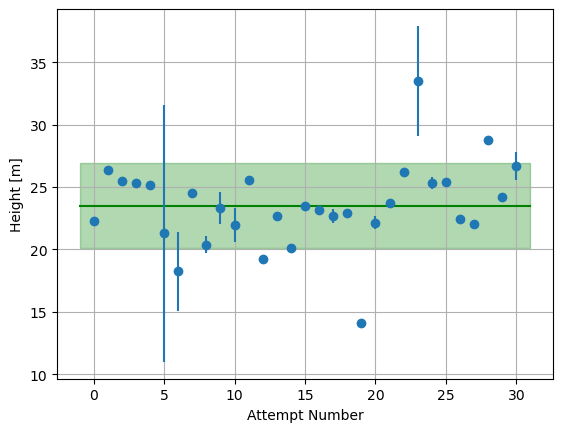

In [24]:
# Let's recreate the plot I made in class. I want to draw a light green rectangle that goes from
# mean-stddev to mean+stddev on the y axis, and spans the whole x axis. Matplotlib can do this with 
# the fill_between function. 

# TODO: Define two variables, low_y and high_y with the minimum and maximum y values for the box.
low_y = heights.mean()-heights.std()
high_y = heights.mean()+heights.std()

# I'll define the x range we want: It looks nicest if it goes from -1 to the number of attempts we have
# You can try fiddling with this to see what I mean. 
x_range = [-1, len(heights)]

# Now we can use the fill_between function to draw our box. The syntax is a bit funny: we're handing it lists
# of values to fill between, the same way we do for the plots. The alpha parameter sets how transparent the 
# color is. 
plt.fill_between(x_range, [low_y, low_y], [high_y, high_y], color="green", alpha=0.3)
# I can use a simple plot function to draw the line I want for the mean. It only has two points: 
# (-1, height_mean) and (len(heights), height_mean) and it draws a line between them. 
plt.plot(x_range, [height_mean, height_mean], color="green")

# Now we can draw our datapoints on the same plot, just as we did before. 
# TODO: Draw the datapoints using the errorbar function as we did above, and label your axes. 
# You can add a grid if you like.
plt.errorbar(indices, heights, uncertainties, marker="o", linestyle="none")
plt.xlabel("Attempt Number")
plt.ylabel("Height [m]")
plt.grid()



**Question: How many datapoints are more than 1 sigma (according to that datapoint's measured uncertainty) away from the green band? You may find it helpful to zoom in on your plot -- you can do this by executing the function** `plt.ylim(22,25)` **for example, to zoom in on the y range from 22 to 25.**

There are 9 datapoints that are more than 1 sigma away from the green band based on the datapoint's measured uncertainty

Now that we can plot our data, let's try to do a little bit of analysis. 

Choose one of your two measured values from the lab. Your final task will be to answer the following statistical question: How compatible is your measurment with the mean value measured by the class? 

Or, put another way, given that the true value is the mean value measured by the class, how likely would it be for you to observe your value, given your measured uncertainty?

In [25]:
# TODO: Add the values of your measurement here.
building_height = 20.79
my_uncertainty = 0.313

# You should still have the mean value of the class's heights stored in a variable from above:
print(height_mean)
print(f"Our measured height was {building_height} m with an unceratainty of {my_uncertainty} m")

# TODO: Write code below that calculates and prints how many sigma away (based on your uncertainty measurement) 
# your measured value was from the class mean.
sigma_away = abs((building_height-height_mean)/my_uncertainty)
print(f"Our measured value was {sigma_away} sigma away from the class mean")


23.514451612903223
Our measured height was 20.79 m with an unceratainty of 0.313 m
Our measured value was 8.704318252086976 sigma away from the class mean


**Question: Using the Gaussian distribution graphic we looked at in class, estimate the probability for your measured value, given the assumption that the class's mean value is the true answer, based on your estimated uncertainty. (In other words, figure out how many sigma you are from the mean value, and use the Gaussian distribution to evaluate what fraction of measurements would be that far away from it.) This can be a rough estimate, to the nearest sigma.**

While trying to find the probability of a measurement being 8 sigma away from the mean, all sources were saying that this value was "practically zero". The closest we could find was a probability of 5 sigma away, which is equal to 0.00003% according to CERN. Our measurement being 8 sigma away goes to show how small our probability was. 

Congratulations, you made it to the end of your first computational lab! I recommend double checking to make sure you completed all `TODO` items and answered all the questions. When you're happy with it, go to `File` then `Download as` and select the HTML option. You can upload this file to the Canvas assignment for this lab. 

**After you upload it, make sure to preview it to make sure everything is there!** In particular, make sure all the output plots and text are in the final file you output. 

_**For a Challenge**_:

Every lab, I'll also offer some challenge exercises for extra credit. These challenges stretch a bit further than our core curriculum, but they can help with your understanding, push your coding skills, and earn you extra points. You can do some or all of them. For this lab, here are your challenges:
1. Write a function that takes in an x value, a $\mu$ value, and a $\sigma$ value as arguments, and returns the output of a Gaussian for those parameters. You can find the definition of a Gaussian in the first class slides. (If you've never written a function before, check out [this](https://www.w3schools.com/python/python_functions.asp) quick explainer.)
2. Using this function, plot your Gaussian. This will look extremely similar to the Sine wave example at the bottom of the Jupyter notebook from Monday's class.
3. Perform a numerical integral of your function to get an exact value for the previous question. The probability can be defined as the integral of a gaussian function with $\mu$ as the class mean and $\sigma$ as your measured uncertainty over all values greater than or equal to your value. I suggest using numpy's trapz function for this. (This one is significantly harder than the others.)
